In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import json
from pathlib import Path
from scipy import stats

In [2]:
# Store filepaths into variable
flight_data_csv = "Flight_on_time_HIX.csv"

In [3]:
# Load Flight Data
flight_data_df = pd.read_csv(flight_data_csv)
flight_data_df.head()

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason
0,TR,4135,GJLOAB,12/1/2019,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft
1,TR,3776,GDISCI,12/1/2019,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN
2,RO,4754,GHHWLL,12/1/2019,HIX,IZN,413,10,10,0,15,25,242,227,0,5,222,NaN
3,XM,5604,GBGWFC,12/1/2019,HIX,IZU,130,10,44,34,34,118,111,155,44,4,151,Weather
4,XM,5612,GBISBC,12/1/2019,HIX,LKF,258,10,234,144,26,300,132,358,146,6,352,Carrier


In [4]:
# Define time bins and labels to categorize scheduled arrival and departure times into time frames
time_bins = [0, 600,1200, 1800,2400]
time_labels = ["Night", "Morning", "Afternoon", "Evening"]


In [5]:
# Create a new column 'Arrival_Time_Frame' and categorize scheduled arrival times
flight_data_df['Arrival_Time_Frame'] = pd.cut(flight_data_df['Scheduled_Arrival_Time'], bins=time_bins, labels=time_labels, right=False)
flight_data_df

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason,Arrival_Time_Frame
0,TR,4135,GJLOAB,12/1/2019,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft,Night
1,TR,3776,GDISCI,12/1/2019,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN,Morning
2,RO,4754,GHHWLL,12/1/2019,HIX,IZN,413,10,10,0,15,25,242,227,0,5,222,NaN,Night
3,XM,5604,GBGWFC,12/1/2019,HIX,IZU,130,10,44,34,34,118,111,155,44,4,151,Weather,Night
4,XM,5612,GBISBC,12/1/2019,HIX,LKF,258,10,234,144,26,300,132,358,146,6,352,Carrier,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65664,NR,2309,GCESHO,12/31/2019,LWI,HIX,1846,2310,2308,0,19,2327,508,505,0,3,502,NaN,Night
65665,YJ,2760,GHEUSF,12/31/2019,MGU,HIX,1011,2328,2324,0,14,2338,131,110,0,11,59,NaN,Night
65666,TR,1610,GBFSNO,12/31/2019,ERR,HIX,1744,2340,13,33,15,28,541,624,43,9,615,LateAircraft,Night
65667,NR,1605,GBHPZC,12/31/2019,LDZ,HIX,1781,2355,2355,0,10,5,550,545,0,3,542,NaN,Night


In [6]:
# Create a new column 'Departure_Time_Frame' and categorize scheduled departure times
flight_data_df['Departure_Time_Frame'] = pd.cut(flight_data_df['Scheduled_Departure_Time'], bins=time_bins, labels=time_labels, right=False)


flight_data_df

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason,Arrival_Time_Frame,Departure_Time_Frame
0,TR,4135,GJLOAB,12/1/2019,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft,Night,Night
1,TR,3776,GDISCI,12/1/2019,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN,Morning,Night
2,RO,4754,GHHWLL,12/1/2019,HIX,IZN,413,10,10,0,15,25,242,227,0,5,222,NaN,Night,Night
3,XM,5604,GBGWFC,12/1/2019,HIX,IZU,130,10,44,34,34,118,111,155,44,4,151,Weather,Night,Night
4,XM,5612,GBISBC,12/1/2019,HIX,LKF,258,10,234,144,26,300,132,358,146,6,352,Carrier,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65664,NR,2309,GCESHO,12/31/2019,LWI,HIX,1846,2310,2308,0,19,2327,508,505,0,3,502,NaN,Night,Evening
65665,YJ,2760,GHEUSF,12/31/2019,MGU,HIX,1011,2328,2324,0,14,2338,131,110,0,11,59,NaN,Night,Evening
65666,TR,1610,GBFSNO,12/31/2019,ERR,HIX,1744,2340,13,33,15,28,541,624,43,9,615,LateAircraft,Night,Evening
65667,NR,1605,GBHPZC,12/31/2019,LDZ,HIX,1781,2355,2355,0,10,5,550,545,0,3,542,NaN,Night,Evening


In [7]:
# Calculate quartiles and IQR
Q1 = flight_data_df['Arrival_Delay_Minutes'].quantile(0.25)
Q3 = flight_data_df['Arrival_Delay_Minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers in a new column
flight_data_df['Is_Outlier'] = flight_data_df['Arrival_Delay_Minutes'].apply(lambda x: 'Yes' if (x < lower_bound or x > upper_bound) else 'No')

# Remove outliers
clean_data_df = flight_data_df[flight_data_df['Is_Outlier'] == 'No']

# Filter out rows with 0 arrival delay minutes
arrival_delay_df  = clean_data_df[clean_data_df['Arrival_Delay_Minutes'] > 0]

# Filter out rows with 0 departure delay minutes
departure_delay_df  = clean_data_df[clean_data_df['Departure_Delay_Minutes'] > 0]

# Separate filtering is performed to exclude cases where there may be a delay in arrival,
#but not in departure, or vice versa. This ensures more accurate analysis of delays.

In [8]:
# Group the data by 'Departure_Time_Frame' and calculate the average departure delay as well as count the frequency
average_dep_delay_by_timeframe = departure_delay_df.groupby('Departure_Time_Frame')['Departure_Delay_Minutes'].mean()
dep_delay_frequency_by_timeframe = departure_delay_df.groupby('Departure_Time_Frame')['Departure_Delay_Minutes'].count()

# Group the data by 'Arrival_Time_Frame' and calculate the average arrival delay as well as count the frequency
average_ariv_delay_by_timeframe = arrival_delay_df.groupby('Arrival_Time_Frame')['Arrival_Delay_Minutes'].mean()
ariv_delay_frequency_by_timeframe = arrival_delay_df.groupby('Arrival_Time_Frame')['Arrival_Delay_Minutes'].count()

In [9]:
# Group the data by both 'Arrival_Time_Frame' and 'Delay_Reason', and count the frequency of each reason

ariv_delay_reason_counts = arrival_delay_df.groupby(['Arrival_Time_Frame', 'Delay_Reason'])['Delay_Reason'].count()
ariv_delay_reason_counts = ariv_delay_reason_counts.reset_index(name='Counts')
ariv_primary_reasons_by_timeframe = ariv_delay_reason_counts.groupby('Arrival_Time_Frame').apply(lambda x: x.loc[x['Counts'].idxmax()])
print(ariv_primary_reasons_by_timeframe)


                   Arrival_Time_Frame Delay_Reason  Counts
Arrival_Time_Frame                                        
Night                           Night          NAS      40
Morning                       Morning          NAS     668
Afternoon                   Afternoon          NAS     629
Evening                       Evening          NAS     605


In [10]:
# Group the data by both 'Departure_Time_Frame' and 'Delay_Reason', and count the frequency of each reason
dep_delay_reason_counts = departure_delay_df.groupby(['Departure_Time_Frame', 'Delay_Reason'])['Delay_Reason'].count()
dep_delay_reason_counts = dep_delay_reason_counts.reset_index(name='Counts')
dep_primary_reasons_by_timeframe = dep_delay_reason_counts.groupby('Departure_Time_Frame').apply(lambda x: x.loc[x['Counts'].idxmax()])
print(dep_primary_reasons_by_timeframe)





                     Departure_Time_Frame  Delay_Reason  Counts
Departure_Time_Frame                                           
Night                               Night       Carrier      27
Morning                           Morning       Carrier     330
Afternoon                       Afternoon  LateAircraft     449
Evening                           Evening  LateAircraft     247


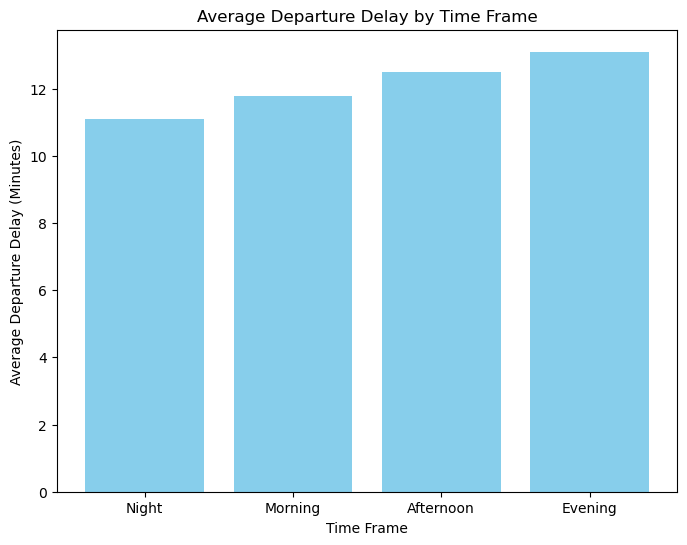

In [11]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
avg_delay = plt.bar(average_dep_delay_by_timeframe.index, average_dep_delay_by_timeframe, color='skyblue')  # Create the bar chart

# Add labels and a title
plt.xlabel("Time Frame")
plt.ylabel("Average Departure Delay (Minutes)")
plt.title("Average Departure Delay by Time Frame")

# Show the plot
plt.show()

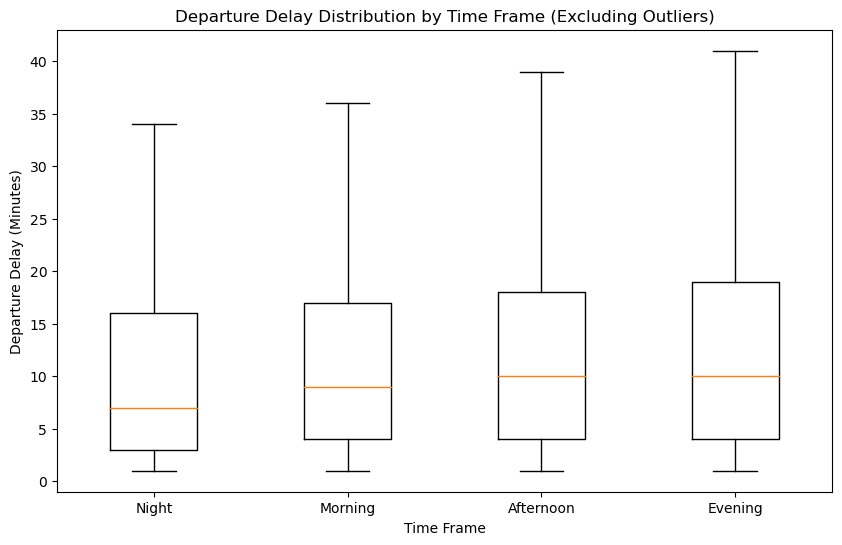

In [12]:
plt.figure(figsize=(10, 6))
plt.boxplot([departure_delay_df[departure_delay_df['Departure_Time_Frame'] == time_frame]['Departure_Delay_Minutes'] for time_frame in time_labels],
            labels=time_labels, showfliers=False)  # Set showfliers to False to exclude outliers
plt.xlabel("Time Frame")
plt.ylabel("Departure Delay (Minutes)")
plt.title("Departure Delay Distribution by Time Frame (Excluding Outliers)")
plt.show()

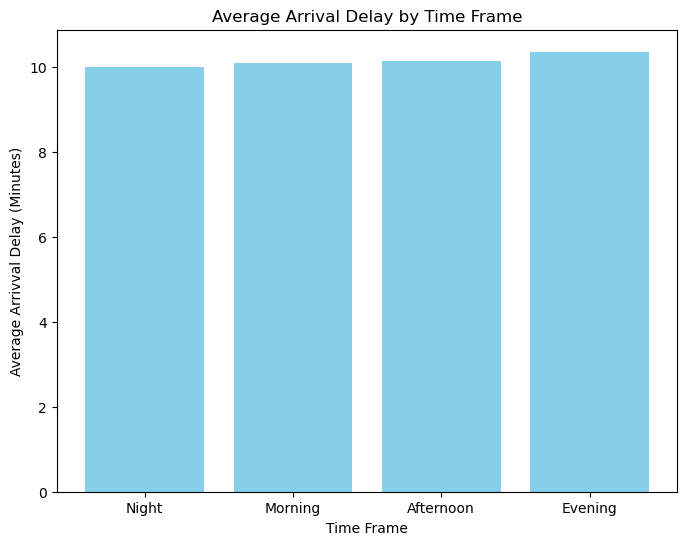

In [13]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
avg_delay = plt.bar(average_ariv_delay_by_timeframe.index, average_ariv_delay_by_timeframe, color='skyblue')  # Create the bar chart

# Add labels and a title
plt.xlabel("Time Frame")
plt.ylabel("Average Arrivval Delay (Minutes)")
plt.title("Average Arrival Delay by Time Frame")

# Show the plot
plt.show()

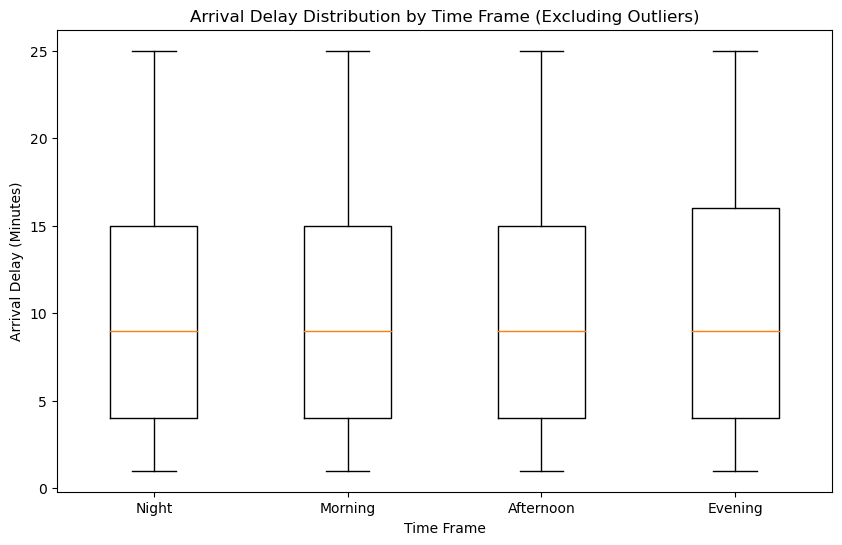

In [14]:

# Create box plots for arrival delay by time frame
plt.figure(figsize=(10, 6))
plt.boxplot([arrival_delay_df[arrival_delay_df['Arrival_Time_Frame'] == time_frame]['Arrival_Delay_Minutes'] for time_frame in time_labels],
            labels=time_labels, showfliers=False)  # Set showfliers to False to exclude outliers
plt.xlabel("Time Frame")
plt.ylabel("Arrival Delay (Minutes)")
plt.title("Arrival Delay Distribution by Time Frame (Excluding Outliers)")
plt.show()

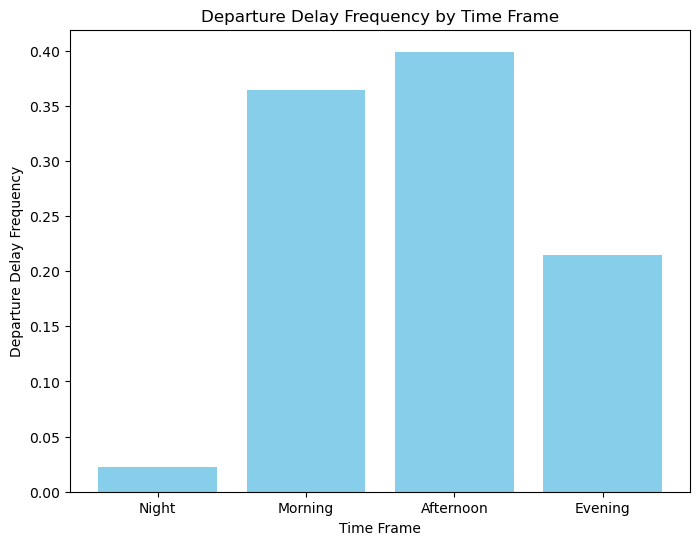

In [15]:
relative_dep_delay_frequency = dep_delay_frequency_by_timeframe / dep_delay_frequency_by_timeframe.sum()


# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
delay_reason = plt.bar(relative_dep_delay_frequency.index, relative_dep_delay_frequency, color='skyblue')  # Create the bar chart

# Add labels and a title
plt.xlabel("Time Frame")
plt.ylabel("Departure Delay Frequency")
plt.title("Departure Delay Frequency by Time Frame")

# Show the plot
plt.show()

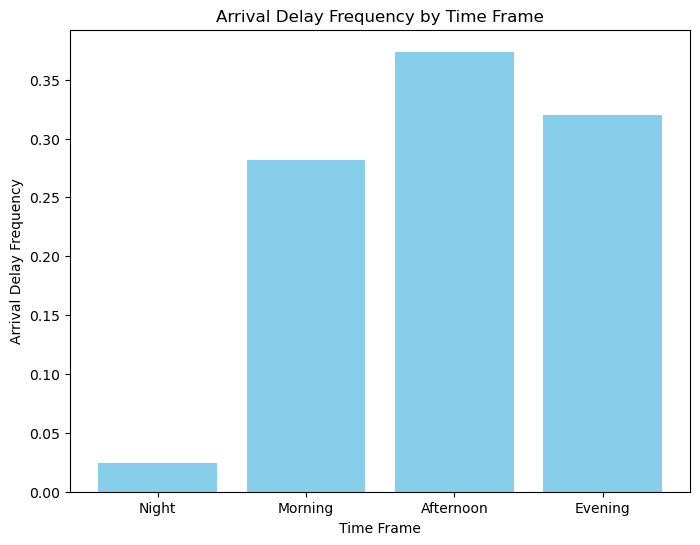

In [16]:
relative_ariv_delay_frequency = ariv_delay_frequency_by_timeframe / ariv_delay_frequency_by_timeframe.sum()


# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
delay_reason = plt.bar(relative_ariv_delay_frequency.index, relative_ariv_delay_frequency, color='skyblue')  # Create the bar chart

# Add labels and a title
plt.xlabel("Time Frame")
plt.ylabel("Arrival Delay Frequency")
plt.title("Arrival Delay Frequency by Time Frame")

# Show the plot
plt.show()

In [17]:
# Calculate the mean departure delay
mean_departure_delay = flight_data_df['Departure_Delay_Minutes'].mean()

# Calculate the mean arrival delay
mean_arrival_delay = flight_data_df['Arrival_Delay_Minutes'].mean()

print("Mean Departure Delay:", mean_departure_delay)
print("Mean Arrival Delay:", mean_arrival_delay)


Mean Departure Delay: 16.243052277330246
Mean Arrival Delay: 325.9465501225845


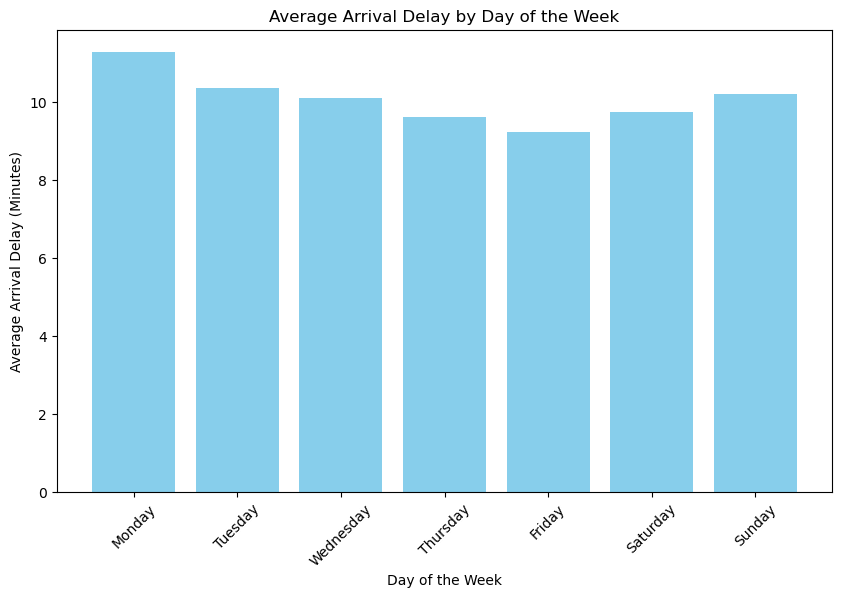

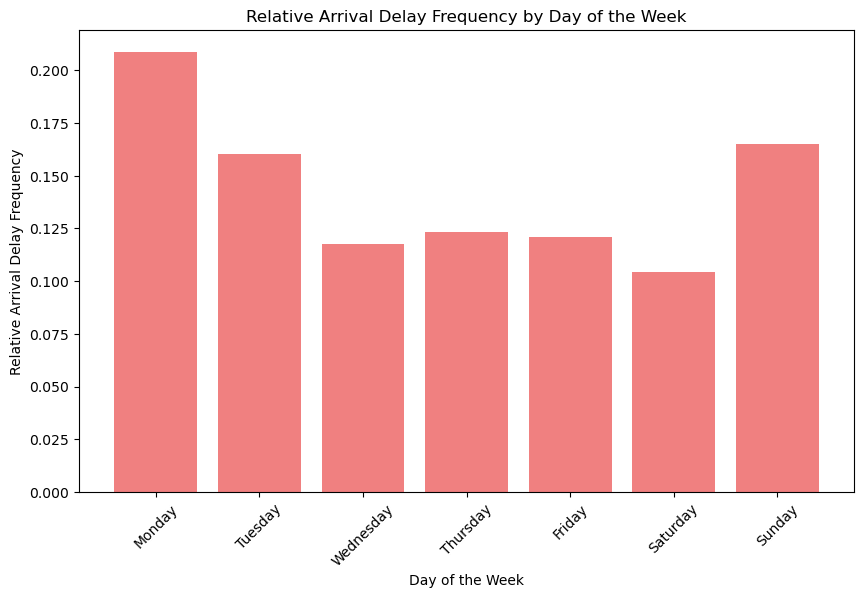

In [18]:
flight_data_df3 = arrival_delay_df.copy()

# Convert 'FlightDate' to datetime format
flight_data_df3['FlightDate'] = pd.to_datetime(flight_data_df3['FlightDate'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
flight_data_df3['DayOfWeek'] = flight_data_df3['FlightDate'].dt.dayofweek

# Group by day of the week and calculate average delay and delay frequency
day_of_week_stats3 = flight_data_df3.groupby('DayOfWeek')['Arrival_Delay_Minutes'].agg(['mean', 'count'])

# Rename the days of the week for better visualization
day_names3 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_stats3.index = [day_names3[i] for i in day_of_week_stats3.index]

# Plot average delay by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_stats3.index, day_of_week_stats3['mean'], color='skyblue')
plt.xlabel("Day of the Week")
plt.ylabel("Average Arrival Delay (Minutes)")
plt.title("Average Arrival Delay by Day of the Week")
plt.xticks(rotation=45)
plt.show()

# Calculate relative arrival delay frequency by day of the week
relative_ariv_delay_frequency_days = day_of_week_stats3['count'] / day_of_week_stats3['count'].sum()

# Plot relative arrival delay frequency by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_stats3.index, relative_ariv_delay_frequency_days, color='lightcoral')
plt.xlabel("Day of the Week")
plt.ylabel("Relative Arrival Delay Frequency")
plt.title("Relative Arrival Delay Frequency by Day of the Week")
plt.xticks(rotation=45)
plt.show()

In [19]:

# Create box plots for arrival delay by day of the week
plt.figure(figsize=(10, 6))
plt.boxplot([flight_data_df3[flight_data_df3['DayOfWeek'] == i]['Arrival_Delay_Minutes'] for i in range(7)],
            labels=day_names, showfliers=False)  # Set showfliers to False to exclude outliers
plt.xlabel("Day of the Week")
plt.ylabel("Arrival Delay (Minutes)")
plt.title("Arrival Delay Distribution by Day of the Week (Excluding Outliers)")
plt.xticks(rotation=45)
plt.show()


NameError: name 'day_names' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
flight_data_df2 = departure_delay_df.copy()

# Convert 'FlightDate' to datetime format
flight_data_df2['FlightDate'] = pd.to_datetime(flight_data_df2['FlightDate'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
flight_data_df2['DayOfWeek'] = flight_data_df2['FlightDate'].dt.dayofweek

# Group by day of the week and calculate average delay and delay frequency
day_of_week_stats = flight_data_df2.groupby('DayOfWeek')['Departure_Delay_Minutes'].agg(['mean', 'count'])

# Rename the days of the week for better visualization
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_stats.index = [day_names[i] for i in day_of_week_stats.index]

# Plot average delay by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_stats.index, day_of_week_stats['mean'], color='skyblue')
plt.xlabel("Day of the Week")
plt.ylabel("Average Departure Delay (Minutes)")
plt.title("Average Departure Delay by Day of the Week")
plt.xticks(rotation=45)
plt.show()


# Calculate relative arrival delay frequency by day of the week
relative_dep_delay_frequency_days = day_of_week_stats['count'] / day_of_week_stats['count'].sum()


# Plot delay frequency by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_stats.index, relative_dep_delay_frequency_days, color='lightcoral')
plt.xlabel("Day of the Week")
plt.ylabel("Departure Delay Frequency")
plt.title("Departure Delay Frequency by Day of the Week")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create box plots for departure delay by day of the week
plt.figure(figsize=(10, 6))
plt.boxplot([flight_data_df2[flight_data_df2['DayOfWeek'] == i]['Departure_Delay_Minutes'] for i in range(7)],
            labels=day_names, showfliers=False)  # Set showfliers to False to exclude outliers
plt.xlabel("Day of the Week")
plt.ylabel("Departure Delay (Minutes)")
plt.title("Departure Delay Distribution by Day of the Week (Excluding Outliers)")
plt.xticks(rotation=45)
plt.show()

**Airport Analysis by Hanns Peter Princivil**

In [ ]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import os
import pandas as pd

# Specify the paths to the datasets
flight_data_path = os.path.join(os.getcwd(), "Flight_on_time_HIX.csv")
airports_data_path = os.path.join(os.getcwd(), "airports.csv")
cities_data_path = os.path.join(os.getcwd(), "cities.csv")

# Read the datasets into pandas DataFrames
flight_df = pd.read_csv(flight_data_path)
airports_df = pd.read_csv(airports_data_path)
cities_df = pd.read_csv(cities_data_path)

# Display the first 2 rows of each DataFrame
display(flight_df.head(2))
display(airports_df.head(2))
display(cities_df.head(2))

**Flight, Airport & City Columns**

In [ ]:
print("Columns of flight_df:")
print(flight_df.columns)
print("\n")

print("Columns of airports_df:")
print(airports_df.columns)
print("\n")

print("Columns of cities_df:")
print(cities_df.columns)

**Origin Airports**

In [ ]:
origin_airports = flight_df["Origin_Airport"].unique()
print(origin_airports)

**Destination Airports**

In [ ]:
destination_airports = flight_df["Destination_Airport"].unique()
print(destination_airports)

**Merging Flight Data with Airport Details to Identify Origin and Destination Cities**

In [ ]:
# Merge flight_df with airports_df to get details about the Origin Airport
flight_with_origin_details = flight_df.merge(airports_df, left_on='Origin_Airport', right_on='code', suffixes=('', '_Origin'))

# Merge the result with airports_df again to get details about the Destination Airport
flight_with_both_airport_details = flight_with_origin_details.merge(airports_df, left_on='Destination_Airport', right_on='code', suffixes=('', '_Destination'))

# Display the resulting DataFrame with details about both the origin and destination airports:
flight_with_both_airport_details.head()

**Top 5 Airports by Total Delayed Flights**

In [ ]:
# If 'code' is not a column name, use the first column as the airport code
airport_code_column = 'code' if 'code' in airports_df.columns else airports_df.columns[0]
city_column = 'City' if 'City' in airports_df.columns else airports_df.columns[1]

# Create boolean masks for flights that experienced any departure or arrival delay
departure_delayed_mask = flight_df['Departure_Delay_Minutes'] > 0
arrival_delayed_mask = flight_df['Arrival_Delay_Minutes'] > 0

# Count the number of delayed flights per airport for departures and arrivals
departure_delay_counts = flight_df[departure_delayed_mask].groupby('Origin_Airport').size()
arrival_delay_counts = flight_df[arrival_delayed_mask].groupby('Destination_Airport').size()

# Combine the results into a single DataFrame
combined_delay_counts_df = pd.DataFrame({
    'Departure Delays Count': departure_delay_counts,
    'Arrival Delays Count': arrival_delay_counts
}).fillna(0).astype(int)  # Replace NaN values with 0 and convert to integer

# Calculate the combined delay counts
combined_delay_counts_df['Combined Delays Count'] = combined_delay_counts_df['Departure Delays Count'] + combined_delay_counts_df['Arrival Delays Count']

# Merge with the airports_df to get the city names
result_df = combined_delay_counts_df.merge(airports_df[[airport_code_column, city_column]], left_index=True, right_on=airport_code_column, how='left').reset_index(drop=True)

# Rename columns for clarity
result_df.rename(columns={airport_code_column: 'Airport Code', city_column: 'City'}, inplace=True)

# Replace NaN values in the "City" column with "Unknown"
result_df['City'].fillna('Unknown', inplace=True)

# Display the top 5 airports with the highest combined delays, along with their corresponding city names
top_5_combined_delays = result_df.sort_values('Combined Delays Count', ascending=False).head(5)[['Airport Code', 'City', 'Departure Delays Count', 'Arrival Delays Count', 'Combined Delays Count']]
top_5_combined_delays

# Reset Index
top_5_combined_delays = top_5_combined_delays.reset_index(drop=True)
top_5_combined_delays

**Top 5 Airports with the Fewest Delayed Flights**

In [ ]:
# Display the top 5 airports with the fewest combined delays, along with their corresponding city names
bottom_5_combined_delays = result_df.sort_values('Combined Delays Count', ascending=True).head(5)[['Airport Code', 'City', 'Departure Delays Count', 'Arrival Delays Count', 'Combined Delays Count']]
bottom_5_combined_delays

# Reset Index
bottom_5_combined_delays = bottom_5_combined_delays.reset_index(drop=True)
bottom_5_combined_delays

**Top 5 Airports by Flight Volume with Breakdown of Departures and Arrivals**

In [ ]:
# Count the number of departures and arrivals per airport
departure_counts = flight_df.groupby('Origin_Airport').size()
arrival_counts = flight_df.groupby('Destination_Airport').size()

# Combine the results into a single DataFrame
flight_volume_df = pd.DataFrame({
    'Departure Counts': departure_counts,
    'Arrival Counts': arrival_counts
}).fillna(0).astype(int)  # Replace NaN values with 0 and convert to integer

# Calculate the total flight volume (both departures and arrivals)
flight_volume_df['Total Flights'] = flight_volume_df['Departure Counts'] + flight_volume_df['Arrival Counts']

# Merge with the airports_df to get the city names
flight_volume_with_details = flight_volume_df.merge(airports_df[[airport_code_column, city_column]], left_index=True, right_on=airport_code_column, how='left')

# Rename columns for clarity
flight_volume_with_details.rename(columns={airport_code_column: 'Airport Code', city_column: 'City'}, inplace=True)

# Display the top 5 airports by flight volume, along with their corresponding city names and breakdown of departures and arrivals
top_5_airports_by_volume = flight_volume_with_details.sort_values('Total Flights', ascending=False).head(5)[['Airport Code', 'City', 'Departure Counts', 'Arrival Counts', 'Total Flights']]
top_5_airports_by_volume

# Reset Index
top_5_airports_by_volume = top_5_airports_by_volume.reset_index(drop=True)
top_5_airports_by_volume

**5 Airports with the Fewest Total Flights: Breakdown of Departures and Arrivals**

In [ ]:
# Display the 5 airports with the fewest total flights, along with their corresponding city names and breakdown of departures and arrivals
bottom_5_airports_by_volume = flight_volume_with_details.sort_values('Total Flights', ascending=True).head(5)[['Airport Code', 'City', 'Departure Counts', 'Arrival Counts', 'Total Flights']]

# Reset Index
bottom_5_airports_by_volume = bottom_5_airports_by_volume.reset_index(drop=True)
bottom_5_airports_by_volume

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame flight_df with columns "Delay_Reason", "Origin_Airport", and "Destination_Airport"
arrival_delays = flight_df[flight_df['Arrival_Delay_Minutes'] > 0]["Destination_Airport"]
departure_delays = flight_df[flight_df['Departure_Delay_Minutes'] > 0]["Origin_Airport"]

# Count the occurrences of delays for each airport for arrivals and departures
arrival_delay_counts = arrival_delays.value_counts().head(10)
departure_delay_counts = departure_delays.value_counts().head(10)

# Create a pie chart for the top 10 airports with arrival delays
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(arrival_delay_counts.values, labels=arrival_delay_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Top 10 Airports: Arrival Delay Distribution", y=1.08)

# Create a pie chart for the top 10 airports with departure delays
plt.subplot(1, 2, 2)
plt.pie(departure_delay_counts.values, labels=departure_delay_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Top 10 Airports: Departure Delay Distribution", y=1.08)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame flight_df with columns "Origin_Airport", "Destination_Airport", "Departure_Delay_Minutes", and "Arrival_Delay_Minutes"

# Create delay reasons
flight_df['Departure_Delay_Reason'] = ['Departure Delay' if delay > 0 else 'No Delay' for delay in flight_df['Departure_Delay_Minutes']]
flight_df['Arrival_Delay_Reason'] = ['Arrival Delay' if delay > 0 else 'No Delay' for delay in flight_df['Arrival_Delay_Minutes']]

# Group the data by "Origin_Airport" and "Delay_Reason" and count the occurrences
grouped_departure = flight_df.groupby(["Origin_Airport", "Departure_Delay_Reason"]).size().reset_index(name="Count").rename(columns={'Origin_Airport': 'Airport'})
grouped_arrival = flight_df.groupby(["Destination_Airport", "Arrival_Delay_Reason"]).size().reset_index(name="Count").rename(columns={'Destination_Airport': 'Airport', 'Arrival_Delay_Reason': 'Departure_Delay_Reason'})

# Combine both grouped DataFrames
combined = pd.concat([grouped_departure, grouped_arrival])

# Aggregate to ensure unique combinations
aggregated = combined.groupby(['Airport', 'Departure_Delay_Reason']).sum().reset_index()

# Pivot the data for plotting
pivot = aggregated.pivot(index="Airport", columns="Departure_Delay_Reason", values="Count").fillna(0)

# Add a total flights column
pivot['Total Flights'] = pivot.sum(axis=1)

# Sort the DataFrame by Total Flights
pivot = pivot.sort_values('Total Flights', ascending=False).head(10)  # Taking top 10 for visualization purposes

# Plot the multi-bar graph
pivot[['Departure Delay', 'Arrival Delay', 'Total Flights']].plot(kind="bar", stacked=True, figsize=(20, 10))

plt.xlabel("Airport")
plt.ylabel("Count")
plt.title("Delays and Total Flights by Airport (Top 10)")
plt.legend(title="Delay Type/Total Flights")

plt.show()

print("Taking a look at this graph, we can observe the main airports experiencing the delays.")
print("However, this may just mean that that airport handles the majority of the flights.")

**Top Busiest Airports by Number of Flights**

In [ ]:
# Counting the number of flights per origin airport
busiest_airports = flight_df['Origin_Airport'].value_counts().reset_index()
busiest_airports.columns = ['Airport_Code', 'Number_of_Flights']

# Displaying top N airports (e.g., N=10 for top 10)
print(busiest_airports.head(10))

**Average Flight Distance by Airport**

In [ ]:
# Calculating average flight distance per origin airport
avg_distance_airports = flight_df.groupby('Origin_Airport')['Flight_Distance'].mean().reset_index()
avg_distance_airports.columns = ['Airport_Code', 'Average_Distance']

# Displaying the airports with the highest average distance (e.g., top 10)
print(avg_distance_airports.sort_values(by='Average_Distance', ascending=False).head(10))

In [ ]:
import matplotlib.pyplot as plt

# Counting the number of flights per origin airport
busiest_airports = flight_df['Origin_Airport'].value_counts().reset_index()
busiest_airports.columns = ['Airport_Code', 'Number_of_Flights']

# Calculating average flight distance per origin airport
avg_distance_airports = flight_df.groupby('Origin_Airport')['Flight_Distance'].mean().reset_index()
avg_distance_airports.columns = ['Airport_Code', 'Average_Distance']

# Merging the two dataframes on Airport_Code
merged_df = busiest_airports.merge(avg_distance_airports, on='Airport_Code')

# Taking the top 10 busiest airports
top_10_airports = merged_df.head(10)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Number_of_Flights
ax1.bar(top_10_airports['Airport_Code'], top_10_airports['Number_of_Flights'], color='b', alpha=0.6, label='Number of Flights')
ax1.set_xlabel('Airport Code')
ax1.set_ylabel('Number of Flights', color='b')
ax1.tick_params('y', colors='b')

# Line plot for Average_Distance using a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(top_10_airports['Airport_Code'], top_10_airports['Average_Distance'], color='r', marker='o', label='Average Flight Distance')
ax2.set_ylabel('Average Flight Distance', color='r')
ax2.tick_params('y', colors='r')

# Title and show the plot
plt.title('Top 10 Busiest Airports: Number of Flights vs. Average Flight Distance')
fig.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Extracting hour from Scheduled_Departure_Time column
flight_df['Departure_Hour'] = flight_df['Scheduled_Departure_Time'] // 100

# Grouping by Departure_Hour and calculating average delay
avg_delay_by_hour = flight_df.groupby('Departure_Hour')['Departure_Delay_Minutes'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(avg_delay_by_hour['Departure_Hour'], avg_delay_by_hour['Departure_Delay_Minutes'], marker='o')
plt.title('Average Departure Delay by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(avg_delay_by_hour['Departure_Hour'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert FlightDate column to datetime format
flight_df['FlightDate'] = pd.to_datetime(flight_df['FlightDate'])

# Extract day from the FlightDate column
flight_df['Day'] = flight_df['FlightDate'].dt.day

# Group by Day and calculate average delay
avg_delay_by_day = flight_df.groupby('Day')['Departure_Delay_Minutes'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(avg_delay_by_day['Day'], avg_delay_by_day['Departure_Delay_Minutes'], marker='o', linestyle='-')
plt.title('Average Departure Delay by Day in December')
plt.xlabel('Day in December')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(avg_delay_by_day['Day'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data
airports = ['YRL', 'TSY', 'LWI', 'FUN', 'CWE', 'LXZ', 'YJX', 'VZX', 'TMJ', 'IZU']
delay_rates = [28.07, 27.68, 27.02, 26.07, 25.37, 24.68, 24.64, 24.38, 24.17, 23.86]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(airports, delay_rates, color='cyan', alpha=0.7)
plt.title('Top Delayed Airports by Delay Rate (100+ Flights)')
plt.xlabel('Airport Code')
plt.ylabel('Delay Rate (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

This bar chart showcases the top airports with significant flight traffic (100 flights or more) that have the highest delay rates. At a glance, YRL Airport leads the pack with a delay rate of 28.07%. The chart provides a clear comparative view, allowing us to identify which airports experience the most frequent delays. Notably, even among the busiest airports, delay rates vary, underscoring the importance of individual airport operations and external factors in influencing flight punctuality.

In [ ]:
import pandas as pd

# Load the flight data
flight_data = pd.read_csv("Flight_on_time_HIX.csv")

# Displaying the first few rows of the dataset to identify the correct column name
flight_data.head()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the flight data
flight_data = pd.read_csv("Flight_on_time_HIX.csv")

# Filter data for YRL airport
yrl_data = flight_data[flight_data['Origin_Airport'] == 'YRL'].copy()

# Extract hour from the departure time
yrl_data.loc[:, 'Departure_Hour'] = yrl_data['Actual_Departure_Time'].apply(lambda x: int(x // 100) if pd.notnull(x) else np.nan)

# Group by departure hour and count delays
yrl_delays_by_hour = yrl_data.groupby('Departure_Hour').apply(lambda x: sum(x['Departure_Delay_Minutes'] > 15)).reset_index()
yrl_delays_by_hour.columns = ['Departure_Hour', 'Delayed']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yrl_delays_by_hour['Departure_Hour'], yrl_delays_by_hour['Delayed'], marker='o', linestyle='-', color='green')
plt.title('Delays by Hour of Day for YRL Airport')


When we look at when flights get delayed at YRL Airport, we notice a couple of busy times. There's a bunch of delays early in the morning, especially between 4-6 AM. Then things get better, but in the afternoon, around 3-4 PM, the delays pick up again. So, what's going on? Maybe the morning issues are because of problems from the night before, or tricky morning weather. And the afternoon? Maybe it's the rush or some other factors. It's definitely something interesting to dig into.

----------Airline Analysis Section-------------------

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [31]:
path = "Flight_on_time_HIX.csv"
df = pd.read_csv("Flight_on_time_HIX.csv")
df.head(2)

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason
0,TR,4135,GJLOAB,12/1/2019,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft
1,TR,3776,GDISCI,12/1/2019,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN


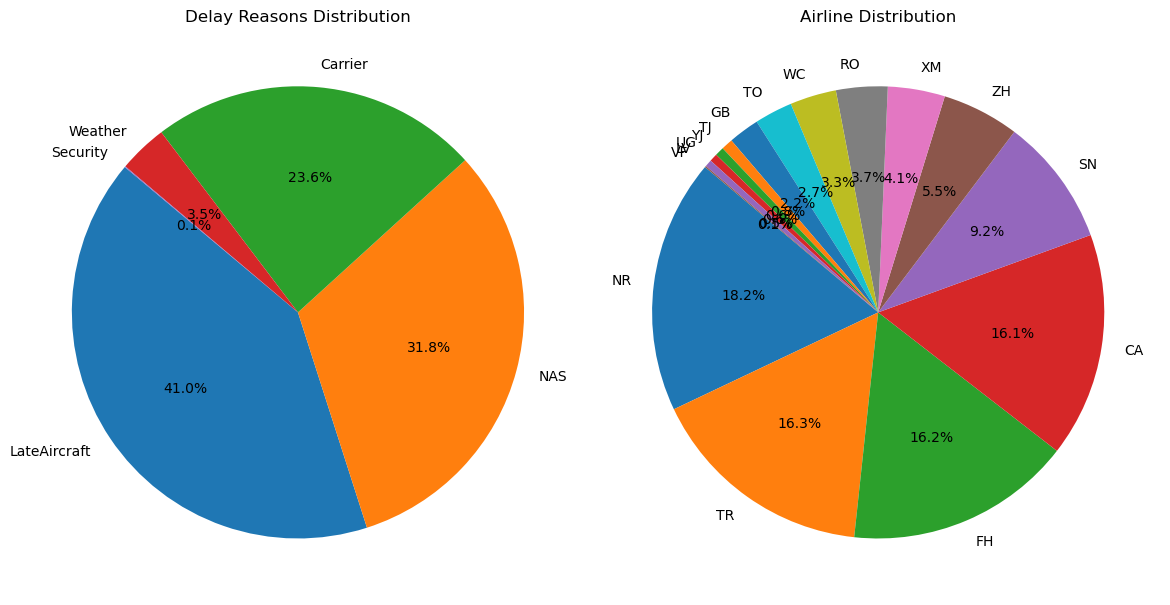

In [32]:
# Assuming you have a DataFrame df with columns "Delay_Reason" and "Airline"
delay_reasons = df["Delay_Reason"]
airlines = df["Airline"]

# Count the occurrences of each delay reason
delay_reason_counts = delay_reasons.value_counts()

# Count the occurrences of each airline
airline_counts = airlines.value_counts()

# Create a pie chart for delay reasons
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(delay_reason_counts.values, labels=delay_reason_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Delay Reasons Distribution")

# Create a pie chart for airlines
plt.subplot(1, 2, 2)
plt.pie(airline_counts.values, labels=airline_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Airline Distribution")

plt.tight_layout()
plt.show()

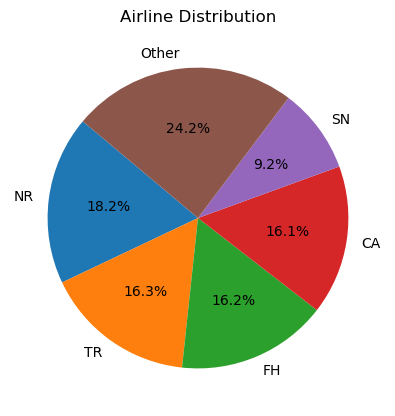

In [33]:
# Calculate the percentage of each airline
airline_percentages = (airline_counts / airline_counts.sum()) * 100

# Group airlines with less than 9% into an "Other" category
threshold = 9
other_airlines = airline_percentages[airline_percentages < threshold]
other_count = other_airlines.sum()
airline_percentages = airline_percentages[airline_percentages >= threshold]
airline_percentages['Other'] = other_count

# Create a pie chart for airlines
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 2)
plt.pie(airline_percentages.values, labels=airline_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title("Airline Distribution")

plt.tight_layout()
plt.show()

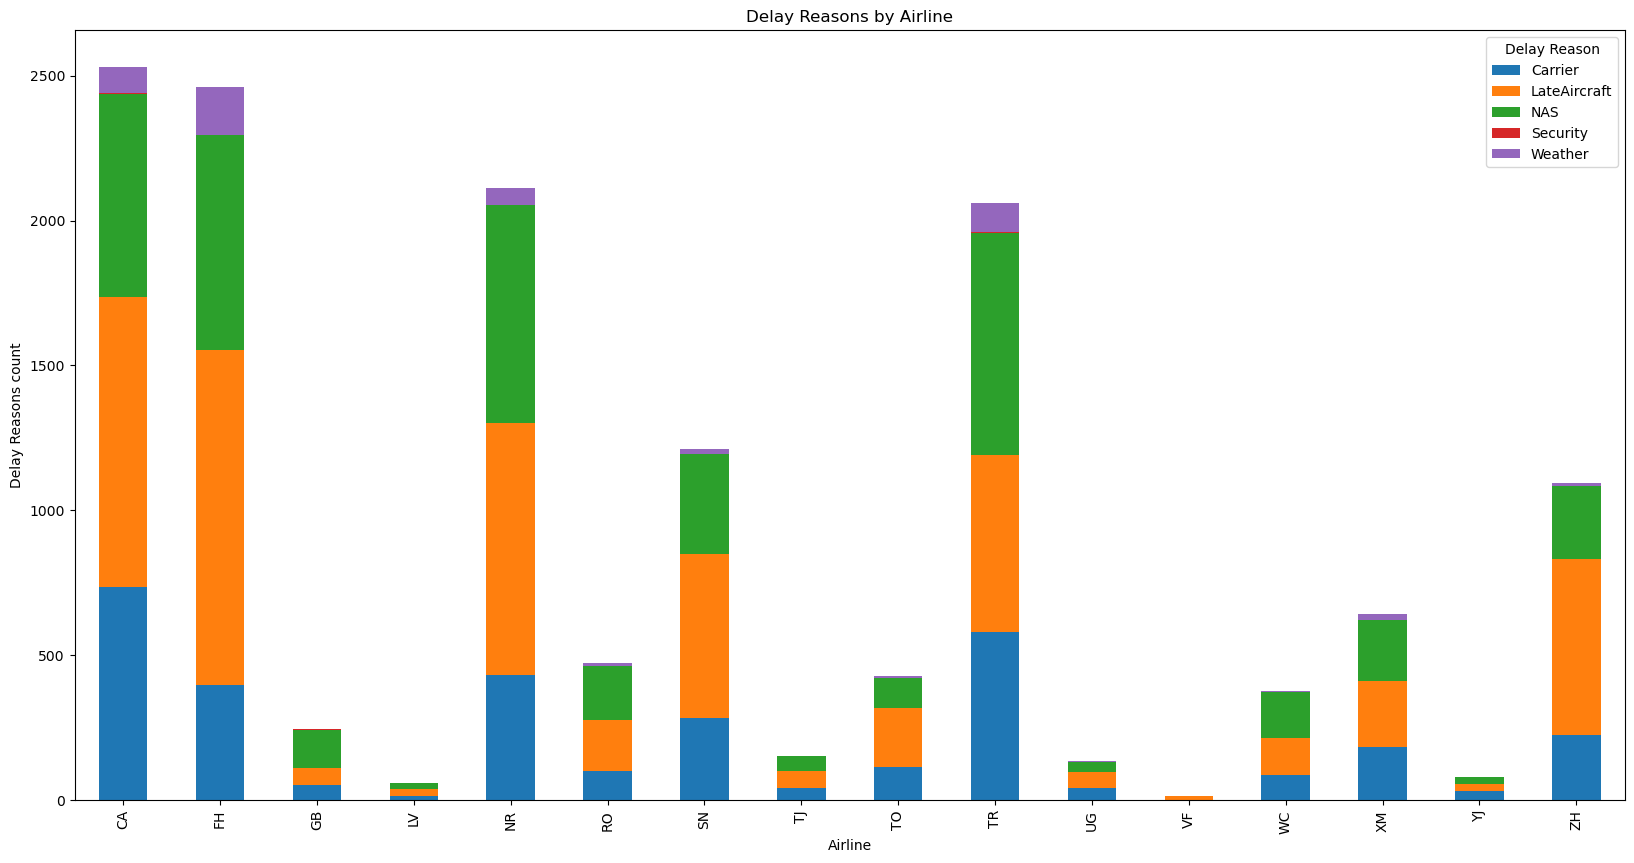

In [34]:
# Count occurrences of delay reasons for each airline and remove all null values. 
delay_reason_counts = df.groupby(["Airline", "Delay_Reason"]).size().unstack(fill_value=0)

# Plot the multi bar graph
x_values = delay_reason_counts.plot(kind="bar", stacked=True, figsize=(20, 10))

plt.xlabel("Airline")
plt.ylabel("Delay Reasons count")
plt.title("Delay Reasons by Airline")
plt.legend(title="Delay Reason")

# Customize x-axis ticks to show only the airlines
x_values.set_xticks(range(len(delay_reason_counts.index)))
x_values.set_xticklabels(delay_reason_counts.index)

plt.show()

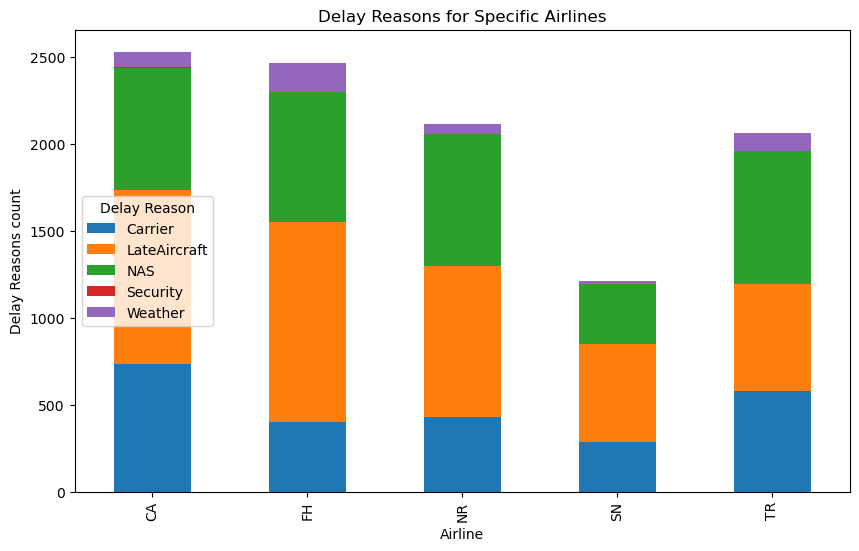

Looking through the selected airlines it seems that CA and FH perform the worst by looking at delay counts.
Despite being tracked more than CA and FH. TR has the less amounts of delays comparatively


In [35]:
# Regraph into selecting specific airlines 
top_airlines = ["FH", "CA", "NR", "TR", "SN"]

# Confirm the airlines
specific_airline_data = df[df['Airline'].isin(top_airlines)]
specific_airline_delay_reason_counts = specific_airline_data.groupby(['Airline', 'Delay_Reason']).size().unstack(fill_value=0)

# Graph the new graph
specific_airlines = specific_airline_delay_reason_counts.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.xlabel("Airline")
plt.ylabel("Delay Reasons count")
plt.title("Delay Reasons for Specific Airlines")
plt.legend(title="Delay Reason")

# Customize x-axis ticks to show only the airlines
specific_airlines.set_xticks(range(len(specific_airline_delay_reason_counts.index)))
specific_airlines.set_xticklabels(specific_airline_delay_reason_counts.index)

plt.show()

print("Looking through the selected airlines it seems that CA and FH perform the worst by looking at delay counts.")
print("Despite being tracked more than CA and FH. TR has the less amounts of delays comparatively")

-------Now calculate the total mean delay in minutes for the arrival and departure.------

In [36]:
# Create column names
arrival_delay_column = 'Arrival_Delay_Minutes'
departure_delay_column = 'Departure_Delay_Minutes'

# Filter rows where both Arrival_Delay_Minutes and Departure_Delay_Minutes are not 0
filtered_df = df[(df[arrival_delay_column] != 0) & (df[departure_delay_column] != 0)]

# Group by 'Airline' and calculate the mean of delays for each airline
grouped_df = filtered_df.groupby('Airline').agg({
    arrival_delay_column: ['mean'],
    departure_delay_column: ['mean']
}).reset_index()

# Rename columns for clarity
grouped_df.columns = ['Airline', 'Mean_Arrival_Delay', 'Mean_Departure_Delay']

# Convert mean columns to integers
grouped_df['Mean_Arrival_Delay'] = grouped_df['Mean_Arrival_Delay'].astype(int)
grouped_df['Mean_Departure_Delay'] = grouped_df['Mean_Departure_Delay'].astype(int)

# Display the cleaned and grouped DataFrame
grouped_df.head()

,Airline,Mean_Arrival_Delay,Mean_Departure_Delay
0,CA,1728,83
1,FH,969,53
2,GB,4250,53
3,LV,45,51
4,NR,821,52


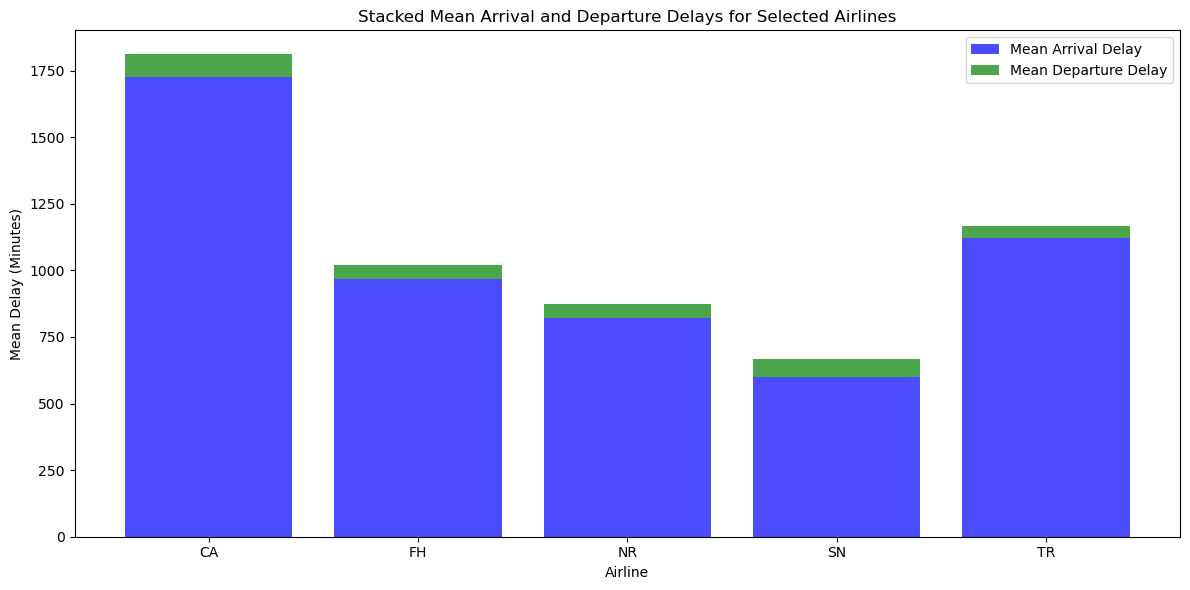

Note that this result is with outliers inclduded in the data


In [37]:
# Select only the desired airlines
selected_airlines = ["FH", "CA", "NR", "TR", "SN"]
filtered_grouped_df = grouped_df[grouped_df['Airline'].isin(selected_airlines)]

# Create a stacked bar chart for Mean Arrival and Departure Delays
plt.figure(figsize=(12, 6))
bar_positions = range(len(filtered_grouped_df))

plt.bar(bar_positions, filtered_grouped_df['Mean_Arrival_Delay'], label='Mean Arrival Delay', color='b', alpha=0.7)
plt.bar(bar_positions, filtered_grouped_df['Mean_Departure_Delay'], bottom=filtered_grouped_df['Mean_Arrival_Delay'], label='Mean Departure Delay', color='g', alpha=0.7)

# Add labels and a legend
plt.xlabel('Airline')
plt.ylabel('Mean Delay (Minutes)')
plt.title('Stacked Mean Arrival and Departure Delays for Selected Airlines')
plt.xticks(bar_positions, filtered_grouped_df['Airline'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

print("Note that this result is with outliers inclduded in the data")

In [38]:
# Create the column names
arrival_delay_column = 'Arrival_Delay_Minutes'
departure_delay_column = 'Departure_Delay_Minutes'

# Filter rows where both Arrival_Delay_Minutes and Departure_Delay_Minutes are not 0
filtered_df = df[(df[arrival_delay_column] != 0) & (df[departure_delay_column] != 0)]

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column_name, threshold=1.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Remove outliers from 'Your_Arrival_Delay_Column' and 'Your_Departure_Delay_Column'
filtered_df = remove_outliers_iqr(filtered_df, arrival_delay_column)
filtered_df = remove_outliers_iqr(filtered_df, departure_delay_column)

# Group by 'Airline' and calculate the mean of delays for each airline
grouped_df = filtered_df.groupby('Airline').agg({
    arrival_delay_column: ['mean'],
    departure_delay_column: ['mean']
}).reset_index()

# Rename columns for clarity
grouped_df.columns = ['Airline', 'Mean_Arrival_Delay', 'Mean_Departure_Delay']

# Convert mean columns to integers
grouped_df['Mean_Arrival_Delay'] = grouped_df['Mean_Arrival_Delay'].astype(int)
grouped_df['Mean_Departure_Delay'] = grouped_df['Mean_Departure_Delay'].astype(int)

# Display the cleaned and grouped DataFrame
grouped_df.head()

,Airline,Mean_Arrival_Delay,Mean_Departure_Delay
0,CA,39,40
1,FH,39,37
2,GB,31,35
3,LV,34,40
4,NR,33,35


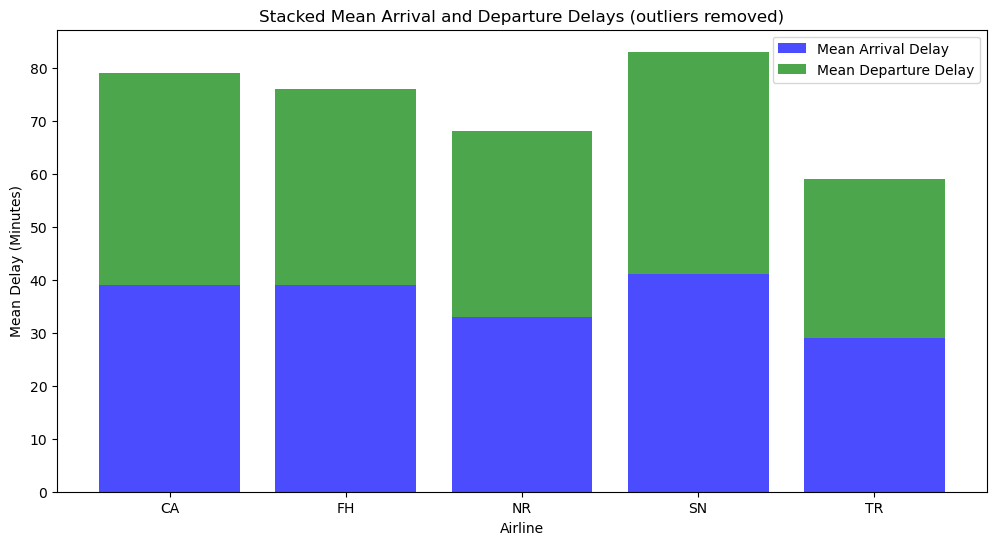

Results when outliers are removed


In [39]:
# Selected airlines
selected_airlines = ["FH", "CA", "NR", "TR", "SN"]

# Filter the DataFrame to include only selected airlines
filtered_grouped_df = grouped_df[grouped_df['Airline'].isin(selected_airlines)]

plt.figure(figsize=(12, 6))
bar_positions = range(len(filtered_grouped_df))

# Create a stacked bar chart for selected airlines
plt.bar(
    bar_positions, filtered_grouped_df['Mean_Arrival_Delay'], 
    label='Mean Arrival Delay', color='b', alpha=0.7
)

plt.bar(
    bar_positions, filtered_grouped_df['Mean_Departure_Delay'], 
    bottom=filtered_grouped_df['Mean_Arrival_Delay'], 
    label='Mean Departure Delay', color='g', alpha=0.7
)

# Add labels and a legend
plt.xlabel('Airline')
plt.ylabel('Mean Delay (Minutes)')
plt.title('Stacked Mean Arrival and Departure Delays (outliers removed)')
plt.xticks(bar_positions, filtered_grouped_df['Airline'])
plt.legend()

plt.show()

print("Results when outliers are removed")